Import necessary pakage

In [54]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

Define a layer

In [ ]:
class Layer:
  def __init__(self,init_w,init_b):
    self.w=tf.Variable(init_w)
    self.b=tf.Variable(init_b)
  
  def compute(self,x):
    result= tf.sigmoid(tf.reshape(tf.matmul(tf.transpose(self.w),tf.reshape(x,[2,1])),[1,3])+self.b)
    output=tf.argmax(result,axis=1)

    return result,output


Input & output

In [ ]:
X = np.array([[0, 4],[-1, 3],[2, 3], [-2, 2],[0, 2], [1, 2],
              [-1, 2],[-3, 1],[-1, 1],[2, 1],[4, 1],[-2, 0],
             [1, 0],[3, 0],[-3, -1],[-2, -1],[2, -1],[4, -1]]).astype(float)
            
Y = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2]).astype(int)

Y_prime=[]
for i in Y:
  y=[]
  for j in range(3):
    if i==j:
      y.append(1)
    else:
      y.append(0)
  Y_prime.append(y)

Y_prime=np.array(Y_prime).astype(float)

In [ ]:
print(Y_prime)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
c=[]
for i in Y:
  if i==0:
    c.append('r')

  elif i==1:
    c.append('b')

  else:
    c.append('g')

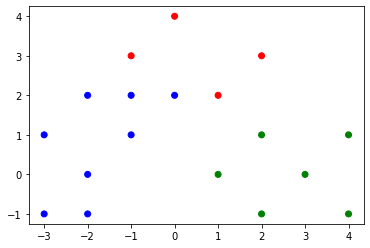

In [ ]:
plt.scatter([i[0] for i in X],[ i[1] for i in X], c=c)

Use given initial w & b

In [ ]:
w = np.array([[0.88, 0.08, -0.34],[0.68, -0.39, -0.19]]).astype(float)
b = np.array([0.0, 0.0, 0.0]).astype(float)

Test

In [ ]:
l=Layer(w,b)
l.compute(X[0])

(<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.93819653, 0.17364665, 0.31864627]])>,
 <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>)

Now write the error and loss

In [ ]:
def error(output,target):
  output=output.numpy()
  sum=0
  for i in range(len(target)):
    if target[i]!=output[i]:
      sum=sum+1
  return sum

In [ ]:
def loss(raw_output,target):
  return tf.reduce_sum(tf.math.log(raw_output)*target)

In [ ]:
def train(layer,input,target,alpha):
  raw_output,output=layer.compute(input)
  delta_j=-(target-raw_output)
  layer.w=layer.w-alpha*tf.matmul(tf.reshape(input,[2,1]),tf.reshape(tf.transpose(delta_j),[1,3]))
  layer.b=layer.b-tf.reshape(alpha*delta_j,[3])

  return layer

Define hyperparameters

In [ ]:
EPOCH=1000
alpha=0.05


In [ ]:
l=Layer(w,b)
cost=[]
for i in range(EPOCH):
  random_sample=random.randint(0,17)
  l=train(l,X[random_sample],Y_prime[random_sample],alpha)
  raw_output,output=l.compute(X[random_sample])
  cost.append(loss(raw_output,Y_prime[random_sample]).numpy())
  if i%100==0:
    raw_output,output=l.compute(X[random_sample])
    print("EPOCH: ", i, end=",")
    print("loss: ", loss(raw_output,Y_prime[random_sample]).numpy())
    #print("Error: ", error(output,Y[random_sample]).numpy()[0])

EPOCH:  0,loss:  -1.176335180619264
EPOCH:  100,loss:  -0.06002543058758279
EPOCH:  200,loss:  -0.03512668620213586
EPOCH:  300,loss:  -0.01478197662622389
EPOCH:  400,loss:  -0.01063997656095017
EPOCH:  500,loss:  -0.2407690981134422
EPOCH:  600,loss:  -0.2810113537773776
EPOCH:  700,loss:  -0.004144366523531293
EPOCH:  800,loss:  -2.786326086956681e-05
EPOCH:  900,loss:  -0.6642540625368936


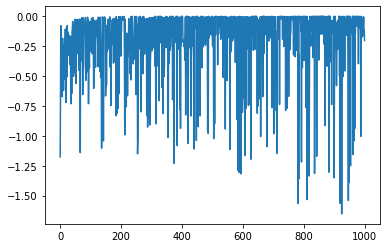

In [ ]:
plt.plot([i for i in range(EPOCH)],cost)

So it is pretty unsteable using SGD.
However, if we use GD...

In [ ]:
class Sigmoid_Layer:
  def __init__(self,init_w,init_b):
    self.w=tf.Variable(init_w)
    self.b=tf.Variable(init_b)
  
  def compute(self,x):
    result= tf.sigmoid(tf.matmul(x,self.w)+self.b) #w: 2*3, so x must be in some shape of n*2
    output=tf.argmax(result,axis=1)

    return result,output #result: n*3, output: n

Test

In [ ]:
sl=Sigmoid_Layer(w,b)
sl.compute(X)

(<tf.Tensor: shape=(18, 3), dtype=float64, numpy=
 array([[0.93819653, 0.17364665, 0.31864627],
        [0.76133271, 0.22270014, 0.44275215],
        [0.97811873, 0.26697985, 0.22270014],
        [0.40131234, 0.28090034, 0.57444252],
        [0.7957597 , 0.31431989, 0.4061269 ],
        [0.90378446, 0.33181223, 0.32739298],
        [0.61774787, 0.29733935, 0.49000133],
        [0.12346705, 0.34751054, 0.69635493],
        [0.450166  , 0.38461624, 0.53742985],
        [0.91982709, 0.44275215, 0.2952543 ],
        [0.98522597, 0.48250714, 0.17508627],
        [0.14679034, 0.46008512, 0.6637387 ],
        [0.70682222, 0.51998934, 0.41580948],
        [0.93339196, 0.55971365, 0.2650274 ],
        [0.03489141, 0.53742985, 0.77029895],
        [0.08017291, 0.55724785, 0.7047457 ],
        [0.74649398, 0.63413559, 0.37989357],
        [0.94479946, 0.67040116, 0.23685498]])>,
 <tf.Tensor: shape=(18,), dtype=int64, numpy=array([0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0])>)

In [ ]:

def train_batch(layer,input,target,alpha):
  raw_output,output=layer.compute(input)
  delta_j=-(target-raw_output) #n*3
  layer.w=layer.w-alpha*tf.matmul(tf.transpose(input),delta_j) #2*n, n*3 ->2*3
  layer.b=layer.b-tf.reduce_sum(delta_j,axis=0)
  return layer

In [ ]:
l=Sigmoid_Layer(w,b)
cost=[]
for i in range(EPOCH):  
  l=train_batch(l,X,Y_prime,alpha)
  raw_output,output=l.compute(X)
  cost.append(loss(raw_output,Y_prime).numpy())
  if i%100==0:
    raw_output,output=l.compute(X)
    print("EPOCH: ", i, end=",")
    print("loss: ", loss(raw_output,Y_prime).numpy())
    #print("Error: ", error(output,Y[random_sample]).numpy()[0])

EPOCH:  0,loss:  -29.7945708617764
EPOCH:  100,loss:  -2.644285827338809
EPOCH:  200,loss:  -2.4175378787940023
EPOCH:  300,loss:  -2.301876470143811
EPOCH:  400,loss:  -2.224795699714709
EPOCH:  500,loss:  -2.1675448924721965
EPOCH:  600,loss:  -2.122459225188302
EPOCH:  700,loss:  -2.0855940577963064
EPOCH:  800,loss:  -2.0546334461652407
EPOCH:  900,loss:  -2.0281004889262344


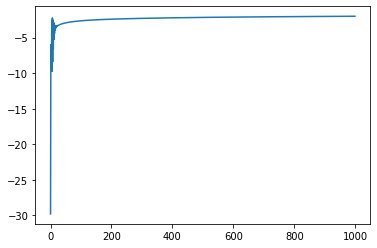

In [ ]:
plt.plot([i for i in range(EPOCH)],cost)

  Take a lot at the final w and b

In [ ]:
print(l.w,l.b)

tf.Tensor(
[[ 2.04861466 -2.90572207  4.86901028]
 [ 9.23768948 -1.41642417 -4.80822146]], shape=(2, 3), dtype=float64) tf.Tensor([-19.79540207   1.73191955  -0.267624  ], shape=(3,), dtype=float64)


For another question

In [3]:
# data
X = np.array([[0.50, 0.23],[0.20, 0.76], [0.17, 0.09], [0.69, 0.95],
     [0.00, 0.51], [0.81, 0.61], [0.72, 0.29], [0.92, 0.72]]).astype('float64')
Y = np.array([[0.16, 0.74], [0.49, 0.97], [0.01, 0.26], [1.19, 1.70],
     [0.13, 0.52], [0.77, 1.48], [0.40, 1.04], [1.14, 1.70]]).astype('float64')

# initialize weights and bias
w = [[1.24, 0.11], [-0.48, 0.97] ].astype('float64')
b = [0., 0.].astype('float64')

Define a perceptron

In [46]:
class Perceptron_Layer:
  def __init__(self,init_w,init_b,u,v):
      self.w=tf.Variable(init_w,dtype='float64')
      self.b=tf.Variable(init_b,dtype='float64')
      self.u=u
      self.v=v
  
  def compute(self,x):
    result= tf.sigmoid(tf.matmul(x,self.w)+self.b) #n*2, 2*2
    return self.u*result+self.v


Test

In [47]:
p=Perceptron_Layer(w,b,1,0)
p.compute(X)

<tf.Tensor: shape=(8, 2), dtype=float64, numpy=
array([[0.6247127 , 0.56908035],
       [0.47083315, 0.68118002],
       [0.54180219, 0.52647522],
       [0.59859155, 0.73054708],
       [0.43910381, 0.62121301],
       [0.6707546 , 0.66391723],
       [0.67996261, 0.58916146],
       [0.68894678, 0.68988891]])>

Define MSE cost and test it

In [107]:
def p_cost(output,target):
  return tf.reduce_mean(tf.reduce_sum(tf.square(target - output), axis=1))

In [49]:
p_cost(p.compute(X),Y)

<tf.Tensor: shape=(), dtype=float64, numpy=4.259419148881815>

Train

In [64]:
X.shape

(8, 2)

In [109]:
def train(layer,input,target,alpha):
  output=layer.compute(input)
  delta_u=-(target-output)*(target*(1-target/layer.u))
  delta_w=alpha*tf.matmul(tf.transpose(input),delta_u) #2*n,n*2
  delta_b=alpha*tf.reduce_sum(delta_u, axis = 0)

  layer.w.assign_sub(delta_w)
  layer.b.assign_sub(delta_b)

  return layer

In [110]:
EPOCH=1000
alpha=0.05

GD

In [111]:
p=Perceptron_Layer(w,b,2,0)
cost=[]
for i in range(EPOCH):
  p=train(p,X,Y,alpha)
  output=p.compute(X)
  cost.append(p_cost(output,Y))
  if i%100==0:
    print(f"epoch: {i}, cost: {p_cost(output,Y)}")



epoch: 0, cost: 0.7043803819681811
epoch: 100, cost: 0.2402248147283384
epoch: 200, cost: 0.14495956876454902
epoch: 300, cost: 0.09339631663805463
epoch: 400, cost: 0.0631645865623069
epoch: 500, cost: 0.0443793015132906
epoch: 600, cost: 0.03218684061179948
epoch: 700, cost: 0.023999118477718615
epoch: 800, cost: 0.01834684435143258
epoch: 900, cost: 0.01435427167222637


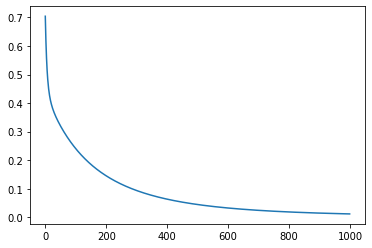

In [112]:
plt.plot([i for i in range(EPOCH)], cost)

SGD

In [113]:
p=Perceptron_Layer(w,b,2,0)
cost=[]
for i in range(EPOCH):
  r=random.randint(0,X.shape[0]-1)
  p=train(p,tf.reshape(X[r],[1,2]),tf.reshape(Y[r],[1,2]),alpha)
  output=p.compute(tf.reshape(X[r],[1,2]))
  cost.append(p_cost(output,tf.reshape(Y[r],[1,2])))
  if i%100==0:
    print(f"epoch: {i}, cost{p_cost(output,tf.reshape(Y[r],[1,2]))}")

epoch: 0, cost0.9193153754759671
epoch: 100, cost0.19139292460788093
epoch: 200, cost0.3346685967618608
epoch: 300, cost0.5341255955934046
epoch: 400, cost0.3108329882106013
epoch: 500, cost0.477540307527366
epoch: 600, cost0.2873049050376198
epoch: 700, cost0.05270642332730637
epoch: 800, cost0.029310826064534175
epoch: 900, cost0.24728453253857896


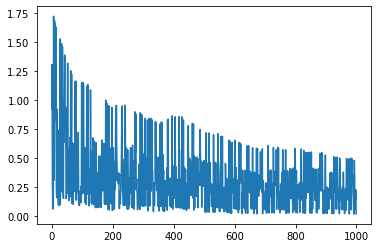

In [114]:
plt.plot([i for i in range(EPOCH)], cost)